In [6]:
# 붙이는 사진 설치
# !wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
# !wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png    
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-09-30 02:28:43--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  90.3MB/s    in 0.7s    

2021-09-30 02:28:43 (90.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [13]:
import cv2 
import matplotlib.pyplot as plt

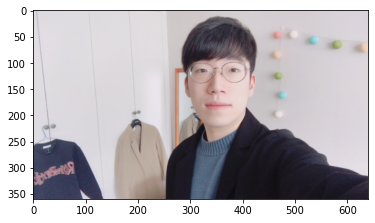

In [119]:
tmp = cv2.imread("./Data/face.png")
tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
tmp = cv2.resize(tmp, (640, 360))
cp_tmp = tmp.copy()
plt.imshow(tmp)

In [41]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(cp_tmp, 1)

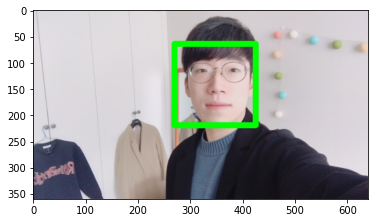

In [53]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(cp_tmp, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)
plt.imshow(cp_tmp)
plt.show()

In [25]:
import os 

model_path = os.getenv('HOME')+'/aiffel/LMS/6_Deep_Learning/sticking_face_project/Model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [43]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(cp_tmp, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


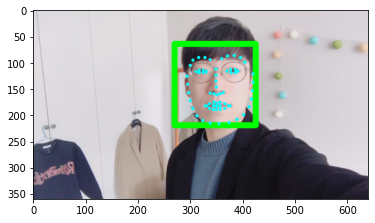

In [54]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(cp_tmp, point, 3, (0, 255, 255), -1) # yellow

plt.imshow(cp_tmp)
plt.show()

In [45]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] # 코의 x 축 위치값
    y = landmark[30][1] - dlib_rect.width() # 
    w = dlib_rect.width() # bounding box 너비
    h = dlib_rect.width() # # bounding box 너비
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 146)
(x,y) : (350,-10)
(w,h) : (156,156)


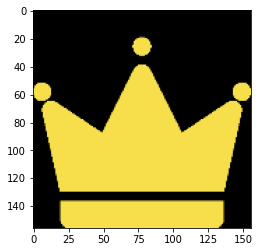

In [91]:
sticker_path = os.getenv('HOME')+'/aiffel/LMS/6_Deep_Learning/sticking_face_project/Data/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)
plt.show()

In [68]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (272,-166)


In [100]:
y = 0

(136, 156, 3)


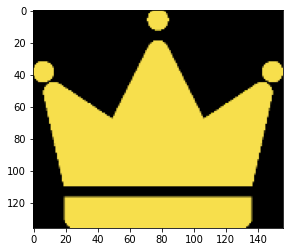

In [93]:
img_sticker = img_sticker[-y:]
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [121]:
import numpy as np

sticker_area = cp_tmp[y:img_sticker.shape[0],x:x+img_sticker.shape[1]]
cp_tmp[y:img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
np.where(img_sticker==0, sticker_area, img_sticker)

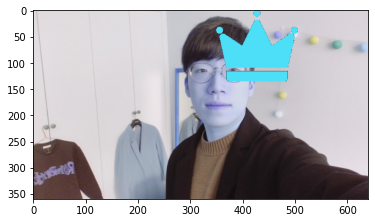

In [122]:
plt.imshow(cv2.cvtColor(cp_tmp, cv2.COLOR_BGR2RGB))
plt.show()

In [124]:
sticker_area

array([[[211, 206, 208],
        [211, 206, 208],
        [211, 206, 208],
        ...,
        [212, 205, 210],
        [211, 204, 209],
        [211, 204, 209]],

       [[211, 206, 208],
        [211, 206, 208],
        [211, 206, 208],
        ...,
        [211, 206, 210],
        [211, 206, 210],
        [210, 205, 209]],

       [[211, 206, 208],
        [211, 206, 208],
        [211, 206, 208],
        ...,
        [211, 207, 211],
        [211, 206, 210],
        [210, 205, 209]],

       ...,

       [[220, 186, 182],
        [228, 195, 191],
        [234, 202, 197],
        ...,
        [207, 200, 205],
        [207, 200, 205],
        [208, 201, 206]],

       [[220, 186, 181],
        [230, 196, 192],
        [235, 203, 197],
        ...,
        [207, 200, 205],
        [207, 200, 205],
        [207, 201, 205]],

       [[221, 187, 182],
        [230, 196, 192],
        [234, 202, 197],
        ...,
        [206, 201, 205],
        [206, 201, 205],
        [206, 201, 205]]